# E-IMU Controller Analysis
analysis by Hans Gaensbauer for the DSES

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
run1 = np.loadtxt("Data/data1_25_dir0_notime.txt",delimiter=",")
run2 = np.loadtxt("Data/data2_50_dir1_time.txt",delimiter=",")
run3 = np.loadtxt("Data/data3_100_dir0_time.txt",delimiter=",")

time2 = run2[:,0] - run2[0,0]
time3 = run3[:,0] - run3[0,0]

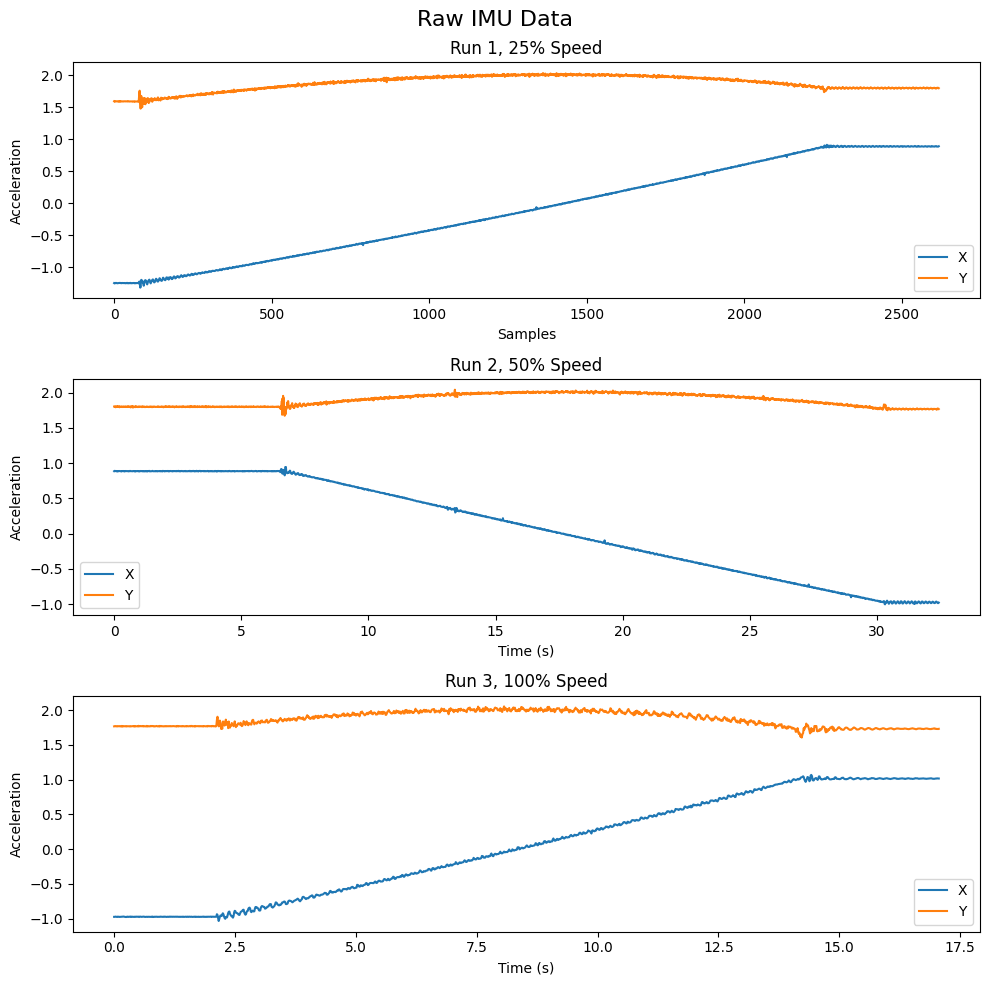

In [94]:
fig1, ax = plt.subplots(3,1,figsize = (10,10))
fig1.suptitle("Raw IMU Data", fontsize=16)

ax[0].plot(run1[:,0])
ax[0].plot(run1[:,1])
ax[0].set_title("Run 1, 25% Speed")
ax[0].legend(["X", "Y"])
ax[0].set_ylabel("Acceleration")
ax[0].set_xlabel("Samples")

ax[1].plot(time2, run2[:,1])
ax[1].plot(time2, run2[:,2])
ax[1].set_title("Run 2, 50% Speed")
ax[1].legend(["X", "Y"])
ax[1].set_ylabel("Acceleration")
ax[1].set_xlabel("Time (s)")

ax[2].plot(time3, run3[:,1])
ax[2].plot(time3, run3[:,2])
ax[2].set_title("Run 3, 100% Speed")
ax[2].legend(["X", "Y"])
ax[2].set_ylabel("Acceleration")
ax[2].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()

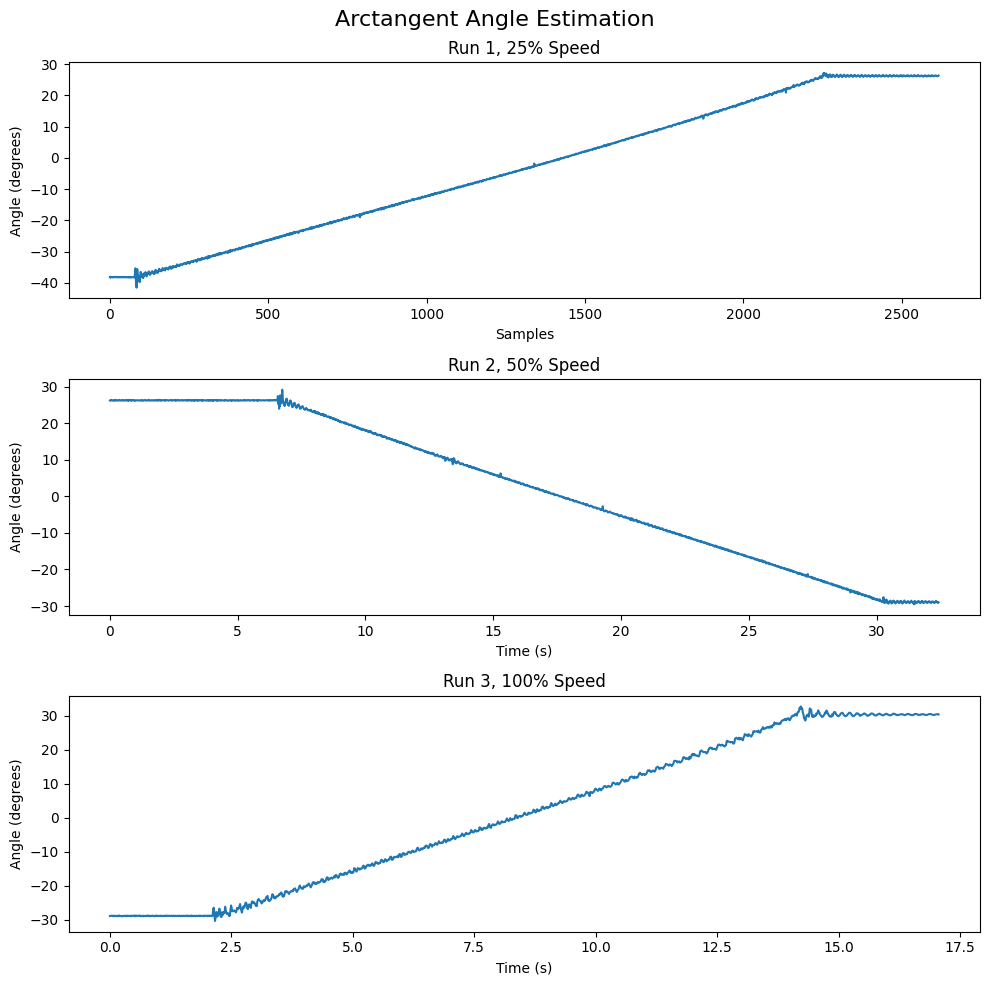

In [88]:
#approximate the angle using arctan
theta_run1 = np.arctan(run1[:,0]/run1[:,1])
theta_run2 = np.arctan(run2[:,1]/run2[:,2])
theta_run3 = np.arctan(run3[:,1]/run3[:,2])

fig2, ax = plt.subplots(3,1,figsize = (10,10))
fig2.suptitle("Arctangent Angle Estimation", fontsize=16)

ax[0].plot(theta_run1 * 180/np.pi)
ax[0].set_title("Run 1, 25% Speed")
ax[0].set_ylabel("Angle (degrees)")
ax[0].set_xlabel("Samples")

ax[1].plot(time2, theta_run2 * 180/np.pi)
ax[1].set_title("Run 2, 50% Speed")
ax[1].set_ylabel("Angle (degrees)")
ax[1].set_xlabel("Time (s)")

ax[2].plot(time3, theta_run3 * 180/np.pi)
ax[2].set_title("Run 3, 100% Speed")
ax[2].set_ylabel("Angle (degrees)")
ax[2].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()

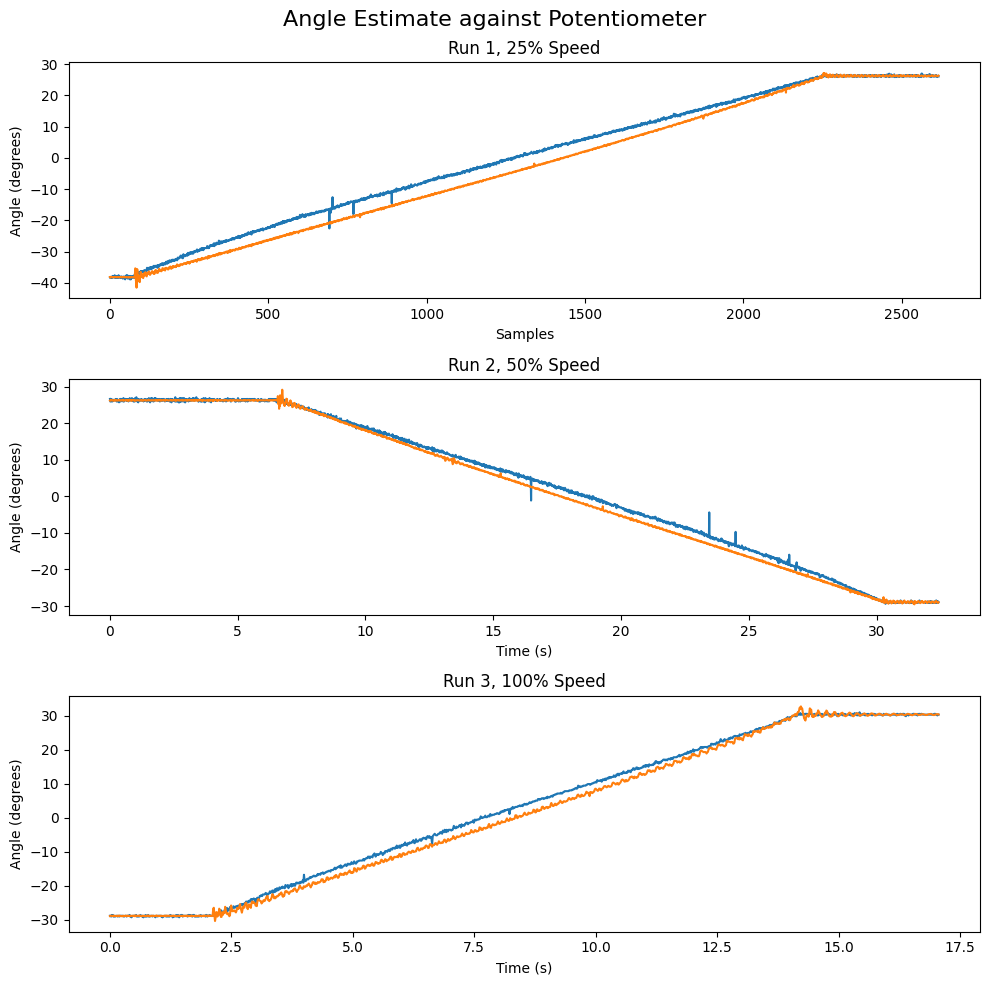

In [90]:
#approximate the angle using arctan
r1tmin = np.average(theta_run1[0:20])
r1tmax = np.average(theta_run1[2500:])
r1pmin = np.average(run1[0:20,3])
r1pmax = np.average(run1[2500:,3])
pot1_norm = (run1[:,3] - r1pmin)/(r1pmax-r1pmin)
pot1_scaled = pot1_norm*(r1tmax-r1tmin)+r1tmin

r2tmin = np.average(theta_run2[0:20])
r2tmax = np.average(theta_run2[2450:])
r2pmin = np.average(run2[0:20,4])
r2pmax = np.average(run2[2450:,4])
pot2_norm = (run2[:,4] - r2pmin)/(r2pmax-r2pmin)
pot2_scaled = pot2_norm*(r2tmax-r2tmin)+r2tmin

r3tmin = np.average(theta_run3[0:20])
r3tmax = np.average(theta_run3[1200:])
r3pmin = np.average(run3[0:20,4])
r3pmax = np.average(run3[1200:,4])
pot3_norm = (run3[:,4] - r3pmin)/(r3pmax-r3pmin)
pot3_scaled = pot3_norm*(r3tmax-r3tmin)+r3tmin

fig3, ax = plt.subplots(3,1,figsize = (10,10))
fig3.suptitle("Angle Estimate against Potentiometer", fontsize=16)

ax[0].plot(pot1_scaled * 180/np.pi)
ax[0].plot(theta_run1 * 180/np.pi)
ax[0].set_title("Run 1, 25% Speed")
ax[0].set_ylabel("Angle (degrees)")
ax[0].set_xlabel("Samples")

ax[1].plot(time2, pot2_scaled * 180/np.pi)
ax[1].plot(time2, theta_run2 * 180/np.pi)
ax[1].set_title("Run 2, 50% Speed")
ax[1].set_ylabel("Angle (degrees)")
ax[1].set_xlabel("Time (s)")

ax[2].plot(time3, pot3_scaled * 180/np.pi)
ax[2].plot(time3, theta_run3 * 180/np.pi)
ax[2].set_title("Run 3, 100% Speed")
ax[2].set_ylabel("Angle (degrees)")
ax[2].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()

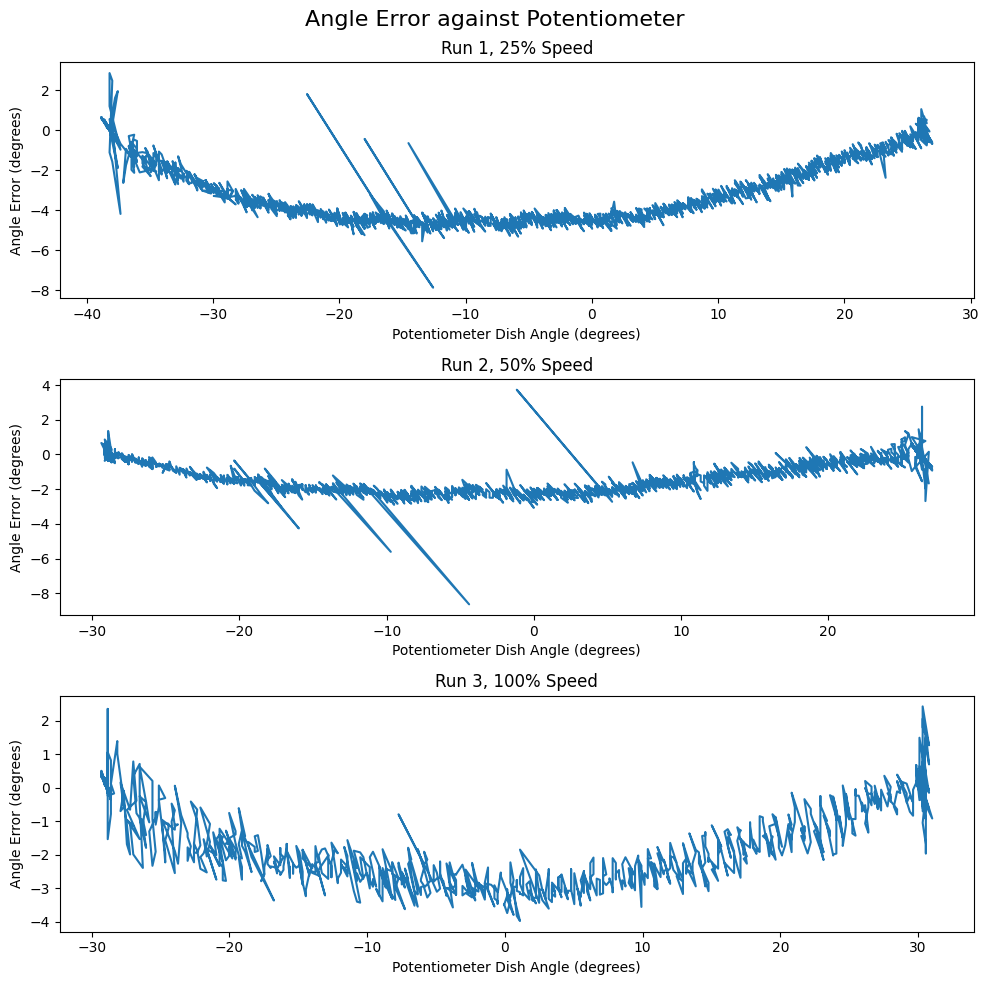

In [93]:
fig4, ax = plt.subplots(3,1,figsize = (10,10))
fig4.suptitle("Angle Error against Potentiometer", fontsize=16)

ax[0].plot(pot1_scaled * 180/np.pi, theta_run1 * 180/np.pi - pot1_scaled * 180/np.pi)
ax[0].set_title("Run 1, 25% Speed")
ax[0].set_ylabel("Angle Error (degrees)")
ax[0].set_xlabel("Potentiometer Dish Angle (degrees)")

ax[1].plot(pot2_scaled * 180/np.pi, theta_run2 * 180/np.pi - pot2_scaled * 180/np.pi)
ax[1].set_title("Run 2, 50% Speed")
ax[1].set_ylabel("Angle Error (degrees)")
ax[1].set_xlabel("Potentiometer Dish Angle (degrees)")

ax[2].plot(pot3_scaled * 180/np.pi, theta_run3 * 180/np.pi - pot3_scaled * 180/np.pi)
ax[2].set_title("Run 3, 100% Speed")
ax[2].set_ylabel("Angle Error (degrees)")
ax[2].set_xlabel("Potentiometer Dish Angle (degrees)")

plt.tight_layout()
plt.show()